## Workshop: Compare Decision Trees and Linear Regression for Wine Quality

This notebook provides a starting point for your work with the assignment

In [1]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the data. We'll start with the white wines only.

dataset_white = pd.read_csv('../data/wine_quality/winequality-white.csv', sep=';')
dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
dataset_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


We can see that the data has been properly loaded and that there are no missing values. 

In [4]:
# Separate the features from the targets 

features_white = dataset_white.drop('quality', axis=1)
targets_white = dataset_white['quality']

# features_white.head()
# targets_white.head()

# Separate the data into training, validation, and test partitions. We'll use a 60/20/20 split. 

trainval_features_white, test_features_white, trainval_targets_white, test_targets_white = train_test_split(features_white, targets_white, test_size=0.2)
train_features_white, val_features_white, train_targets_white, val_targets_white = train_test_split(trainval_features_white, trainval_targets_white, test_size=0.25)

In [5]:
# Train a regressor with default values

dt = DecisionTreeRegressor()
dt.fit(train_features_white, train_targets_white)

DecisionTreeRegressor()

In [6]:
# Our custom evaluate function. Evaluates on train and validation data per default. Set
# final_eval to True to include the test set.
def evaluate(model, final_eval=False):
    predictions_train = model.predict(train_features_white)
    predictions_val = model.predict(val_features_white)

    print(f"Train R2: {r2_score(train_targets_white, predictions_train)}")
    print(f"Train MSE: {mean_squared_error(train_targets_white, predictions_train)}")
    print(f"Train MAE: {mean_absolute_error(train_targets_white, predictions_train)}")
    print()
    print(f"Validation R2: {r2_score(val_targets_white, predictions_val)}")
    print(f"Validation MSE: {mean_squared_error(val_targets_white, predictions_val)}")
    print(f"Validation MAE: {mean_absolute_error(val_targets_white, predictions_val)}")
    if final_eval:
        predictions_test = model.predict(test_features_white)
        print()
        print(f"R2: {r2_score(test_targets_white, predictions_test)}")
        print(f"MSE: {mean_squared_error(test_targets_white, predictions_test)}")
        print(f"MAE: {mean_absolute_error(test_targets_white, predictions_test)}")


In [7]:
# Evaluate our first decision tree
evaluate(dt)

Train R2: 1.0
Train MSE: 0.0
Train MAE: 0.0

Validation R2: 0.16399251195107079
Validation MSE: 0.6979591836734694
Validation MAE: 0.5061224489795918


The tree has been perfectly fitted to the training data, but provides poor results on validation data i.e. the model is highly overfitted. The negative R2 score tells us that the mean target value is better than the model on validation data.

In [8]:
# Create a new decision tree where the depth of the tree is controlled by specifying the minimum 
# amount of instances that can be used create a new split.

dt2 = DecisionTreeRegressor(min_samples_split=20)
dt2.fit(train_features_white, train_targets_white)

# Evaluate the model
evaluate(dt2)

Train R2: 0.7348539115240937
Train MSE: 0.20554157127551131
Train MAE: 0.3094393989341849

Validation R2: 0.2223361158452748
Validation MSE: 0.6492497465826575
Validation MAE: 0.5741155168536385


The R2 score has reduced on training but increased significantly for validation data. We have less overfitting, but still a significant amount. dt2 outperforms dt on all validation metrics, so we can conclude that dt2 is the better model.
 
The MAE is 0.55 on validation data, meaning that the predictions are on average half a quality point off. This is likely not that bad, considering wine quality is at least partly a subjective matter.

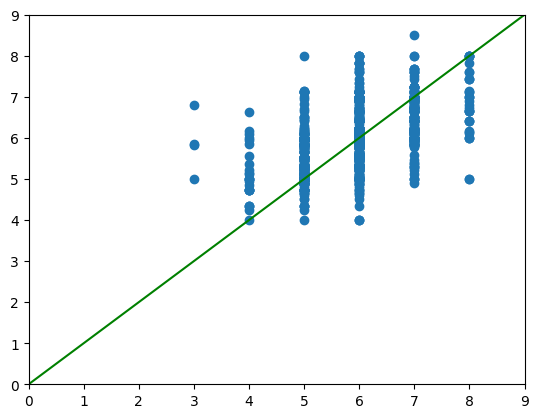

In [9]:
plt.scatter(test_targets_white, dt2.predict(test_features_white))
plt.plot([0, 9], [0, 9], c='green')
plt.axis((0, 9, 0, 9))
plt.show()

The plot shows predicted values (Y-axis) versus the ground-truth data (X-axis). The green line indicate what would be perfect correlation. We can see that the decision tree overestimates the quality of the lower quality wines, and underestimates the quality of what should be higher quality wine. There is a slight correlation, but it seems to largely random. Either the model is performing badly, or it might also indicate that the percieved quality of a wine might not be detectable in a chemical signature.

In [10]:
# Train and evaluate a linear regression model with default parameters
lr = LinearRegression()
lr.fit(train_features_white, train_targets_white) 
evaluate(lr)

Train R2: 0.281734769966438
Train MSE: 0.5568000826347484
Train MAE: 0.5797223422279874

Validation R2: 0.2767548002024306
Validation MSE: 0.6038171146344117
Validation MAE: 0.5987496797266962


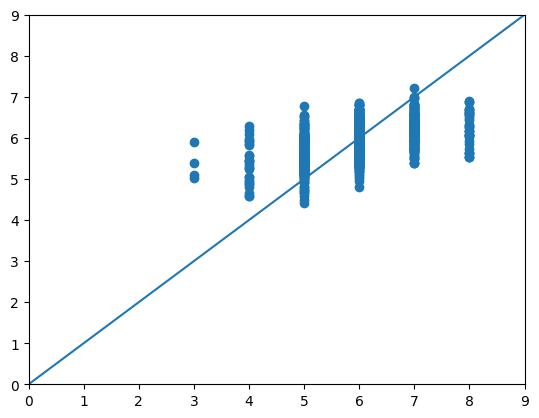

In [11]:
plt.scatter(test_targets_white, lr.predict(test_features_white))
plt.plot([0, 9], [0, 9])
plt.axis((0, 9, 0, 9))
plt.show()

Though the average absolute error is higher, the MSE is lower for linear regression model than decision tree. This means that LR makes more smaller mistakes. The scatter plot confirms the fact that LR makes smaller mistakes.

## Final Thoughts

The dataset might be better suited for (ordinal) classfication